<a href="https://colab.research.google.com/github/AngelicaAlfonsoH/INSE6220_FinalProject/blob/main/INSE_6220_newcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [59]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.preprocessing import label_binarize
from sklearn import svm
from numpy import linalg as LA
from sklearn.multiclass import OneVsRestClassifier

**Upload files into Colaboratory**

In [60]:
#from google.colab import files
#uploaded = files.upload()

**Read the Dataset File**

In [61]:
df =pd.read_csv('/content/Occupancy_EstimationV6.csv')
df.columns
df.head(11)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S2_Light,Class
0,24.94,24.75,24.56,25.38,34,1
1,24.94,24.75,24.56,25.44,33,1
2,25.00,24.75,24.50,25.44,34,1
3,25.00,24.75,24.56,25.44,34,1
4,25.00,24.75,24.56,25.44,34,1
5,25.00,24.81,24.56,25.44,34,1
6,25.00,24.75,24.56,25.44,34,1
7,25.00,24.81,24.56,25.44,34,1
8,25.00,24.81,24.56,25.50,34,1
9,25.31,25.25,24.88,25.75,31,1


In [62]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S2_Light,Class
0,24.94,24.75,24.56,25.38,34,1
1,24.94,24.75,24.56,25.44,33,1
2,25.00,24.75,24.50,25.44,34,1
3,25.00,24.75,24.56,25.44,34,1
4,25.00,24.75,24.56,25.44,34,1


**Checking for null values**

In [63]:
df.dtypes
df.isnull().sum()
# no null values and hence no replacing
#df.fillna(df.mean(),inplace=True)
#df = df.dropna()

S1_Temp     0
S2_Temp     0
S3_Temp     0
S4_Temp     0
S2_Light    0
Class       0
dtype: int64

**Classes**

In [64]:
Y= df['Class']
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
8729    0
8730    0
8731    0
8732    0
8733    0
Name: Class, Length: 8734, dtype: int64


In [65]:
Y= df['Class']
df.drop(['Class',],axis=1,inplace=True)

** Representing the Count of Date Types**

<Axes: title={'center': 'Count of different varieties of Dates'}>

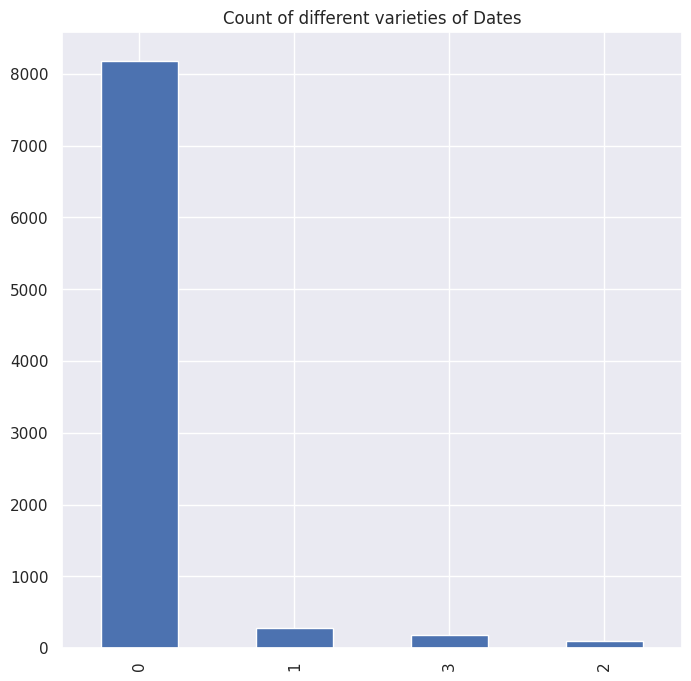

In [66]:
plt. figure(figsize=(8,8))
plt.title("Count of different varieties of Dates")
Y.value_counts().plot(kind = 'bar')

**Normalizing the data**

In [67]:
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S1_Temp   8734 non-null   float64
 1   S2_Temp   8734 non-null   float64
 2   S3_Temp   8734 non-null   float64
 3   S4_Temp   8734 non-null   float64
 4   S2_Light  8734 non-null   float64
dtypes: float64(5)
memory usage: 341.3 KB


**Observations and variables**

In [68]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

*Visualisation of the data using a box plot*

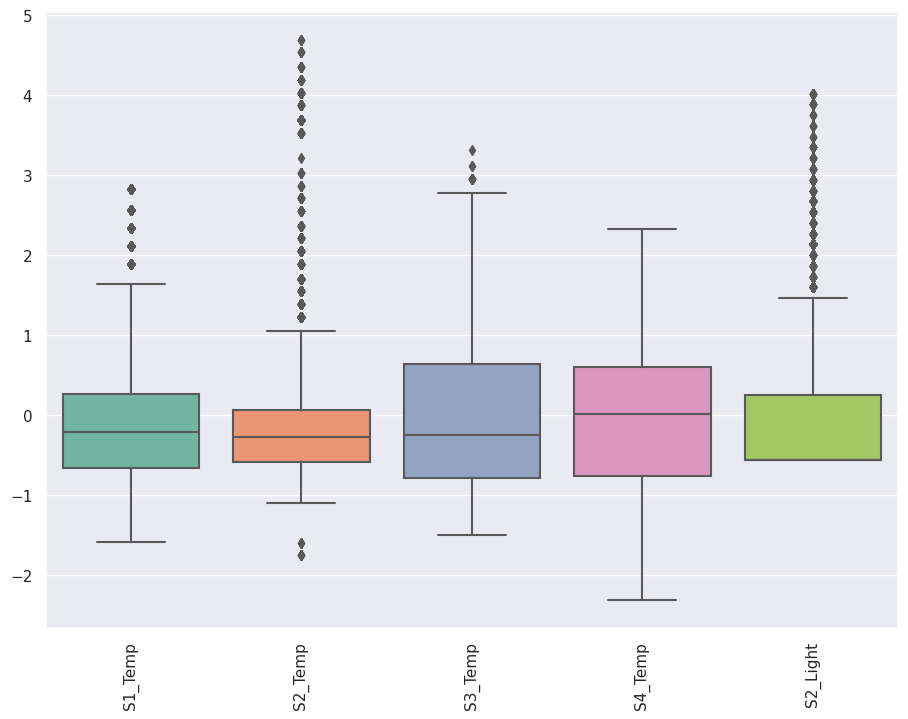

In [69]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1)
ax=sns.boxplot(data=df, orient="v", palette="Set2")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Stripplot to show the datapoints on top of the boxes*

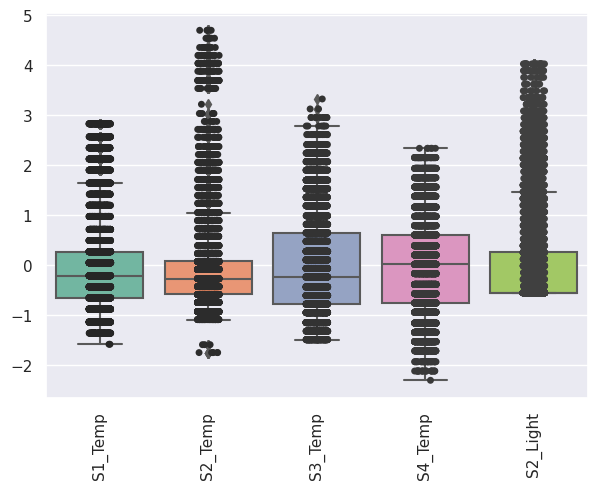

In [70]:
sns.set(rc={'figure.figsize':(7,5)}, font_scale=1)
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Pairplot*

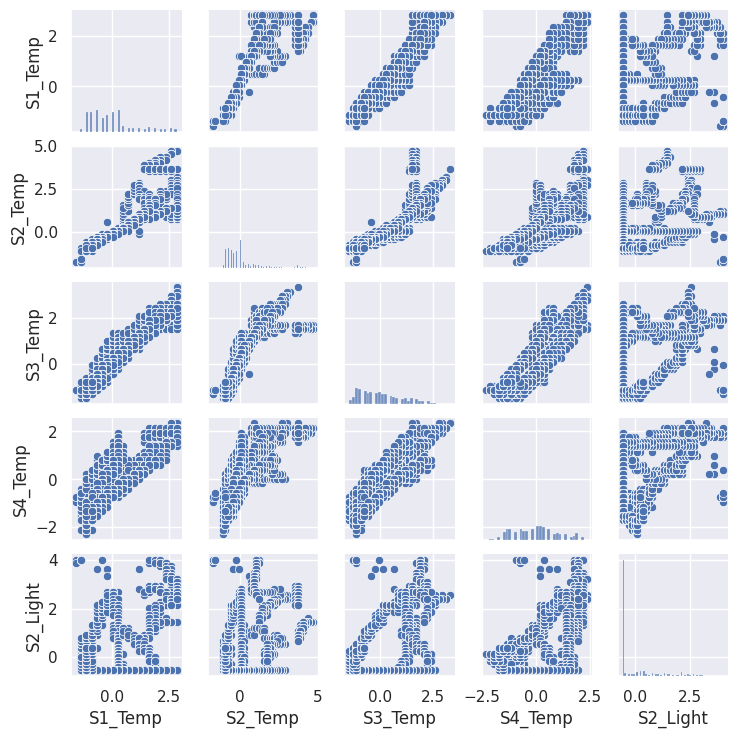

In [71]:
g=sns.pairplot(df,height=1.5)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

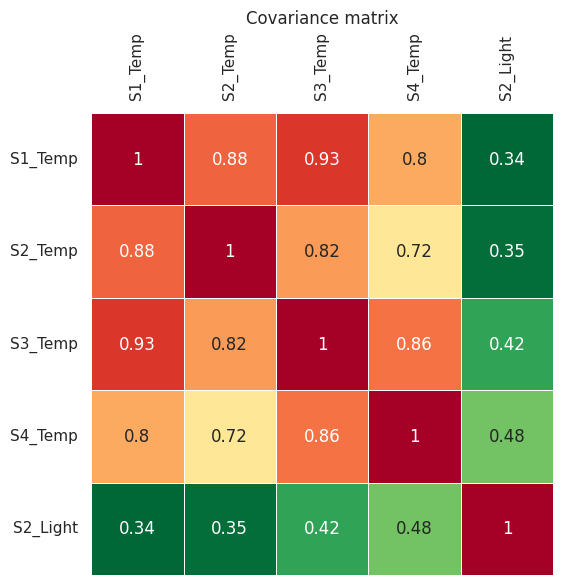

In [72]:
dfc = df - df.mean() #centered data
plt. figure(figsize=(6,6))
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

In [73]:
#calculating Eigen vectors & eigen values
w, v = LA.eig(dfc.cov())

In [74]:
#eigen values
w

array([3.73730744, 0.79948484, 0.0582661 , 0.132423  , 0.27251862])

In [75]:
#eigen vectors
v

array([[-0.48907026, -0.24876735,  0.71395538,  0.41955443, -0.11474707],
       [-0.46415759, -0.2246578 , -0.19934173, -0.51435175, -0.65558505],
       [-0.49576595, -0.11712534, -0.65879159,  0.52320309,  0.18096948],
       [-0.47086142,  0.04991977,  0.11694146, -0.52817175,  0.69509484],
       [-0.27905853,  0.93350594,  0.05337537,  0.08191149, -0.20281658]])

**Principal component analysis**

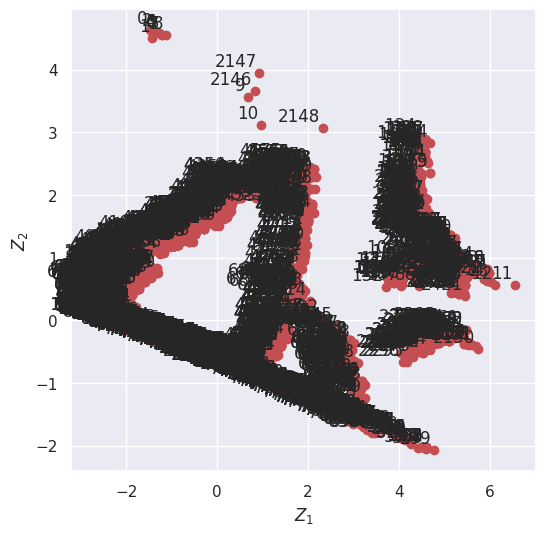

In [76]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
plt. figure(figsize=(6,6))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations, Z[:,0], Z[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

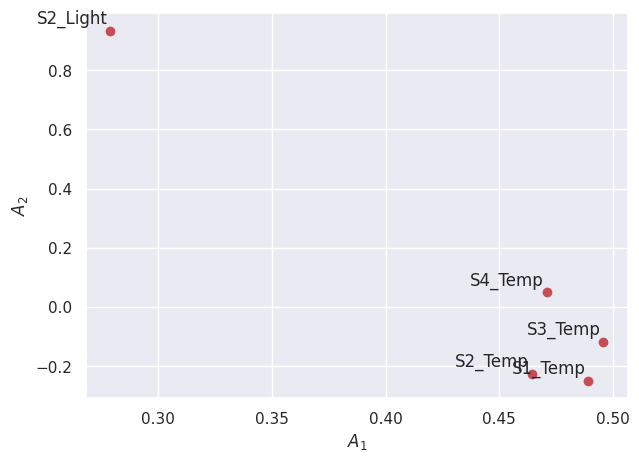

In [77]:
A = pca.components_.T
#print(A.round(4))
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:,0],A[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

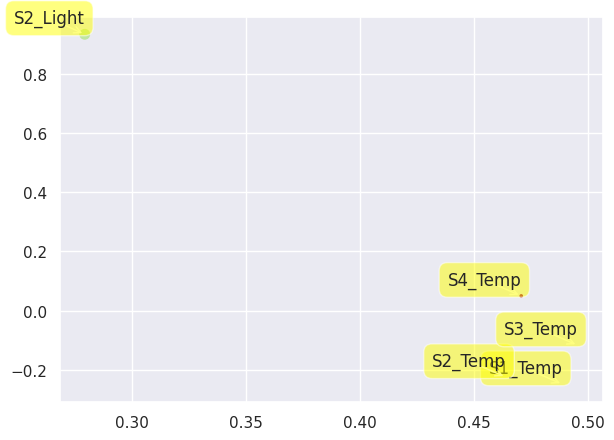

In [78]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

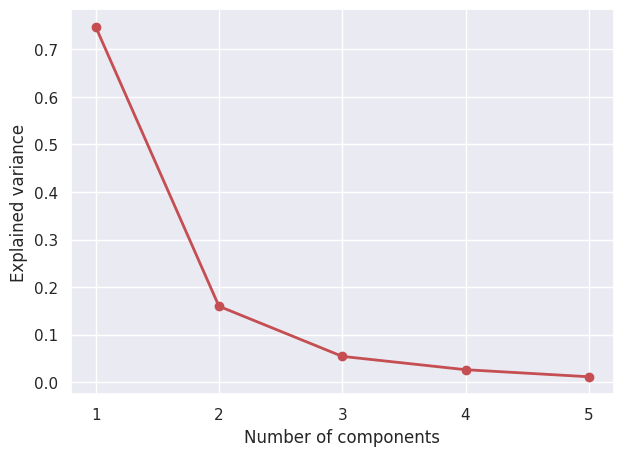

In [79]:
#Eigenvalues
Lambda = pca.explained_variance_
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained variance**

[74.7 16.   5.5  2.6  1.2]


Text(0, 0.5, 'Cumulative explained variance')

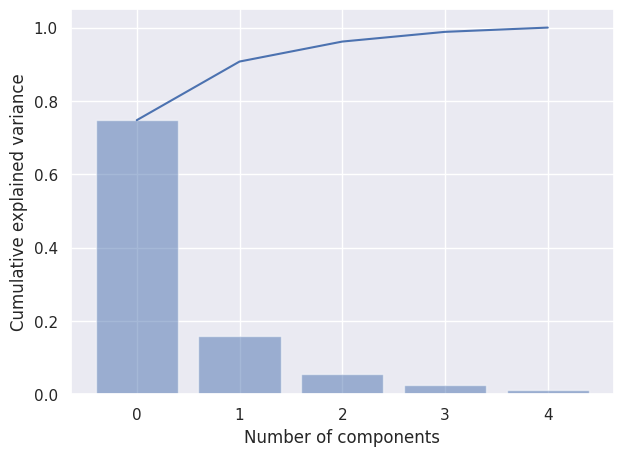

In [80]:
#Explained variance
ell = pca.explained_variance_ratio_
print(ell.round(3)*100)
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

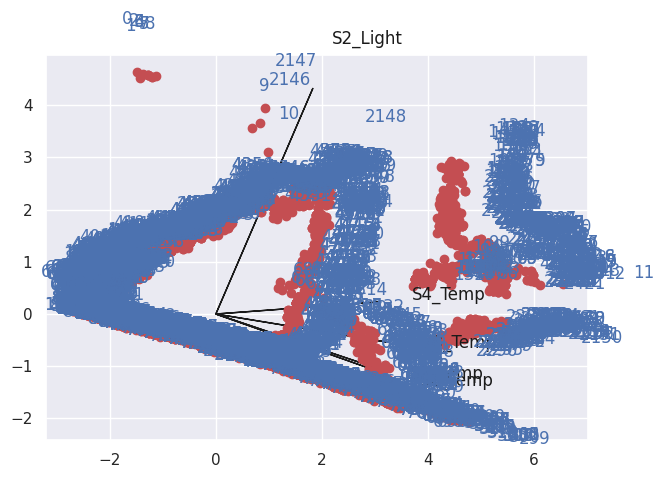

In [81]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal Components**

Text(0.5, 1.0, 'Principal components')

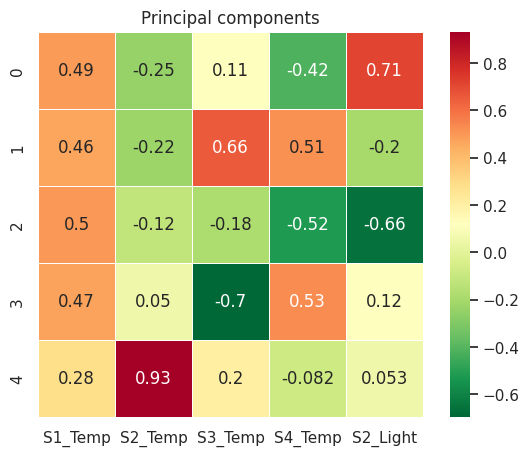

In [82]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, 
            square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

**Hotelling's T2 test**

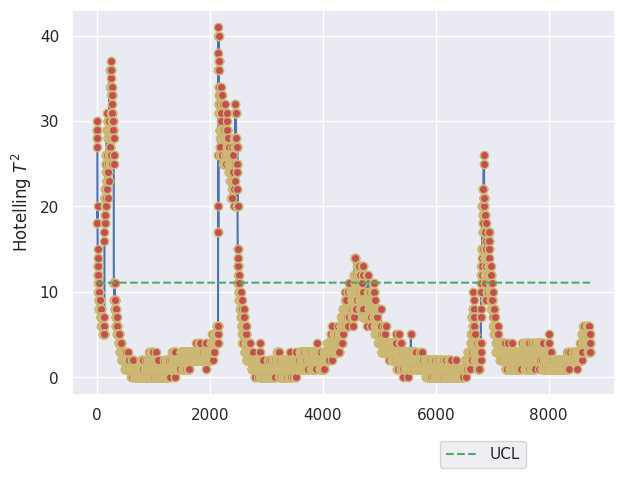

In [83]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda)) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Out of control points**

In [84]:
print (np.argwhere(Tsquare>UCL))

[[   0]
 [   1]
 [   2]
 [   3]
 [   4]
 [   5]
 [   6]
 [   7]
 [   8]
 [   9]
 [  10]
 [  11]
 [  12]
 [  13]
 [  14]
 [  15]
 [  16]
 [  17]
 [  18]
 [  19]
 [  20]
 [  21]
 [  22]
 [  23]
 [  24]
 [  25]
 [ 133]
 [ 134]
 [ 135]
 [ 136]
 [ 137]
 [ 138]
 [ 139]
 [ 140]
 [ 141]
 [ 142]
 [ 143]
 [ 144]
 [ 145]
 [ 146]
 [ 147]
 [ 148]
 [ 149]
 [ 150]
 [ 151]
 [ 152]
 [ 153]
 [ 154]
 [ 155]
 [ 156]
 [ 157]
 [ 158]
 [ 159]
 [ 160]
 [ 161]
 [ 162]
 [ 163]
 [ 164]
 [ 165]
 [ 166]
 [ 167]
 [ 168]
 [ 169]
 [ 170]
 [ 171]
 [ 172]
 [ 173]
 [ 174]
 [ 175]
 [ 176]
 [ 177]
 [ 178]
 [ 179]
 [ 180]
 [ 181]
 [ 182]
 [ 183]
 [ 184]
 [ 185]
 [ 186]
 [ 187]
 [ 188]
 [ 189]
 [ 190]
 [ 191]
 [ 192]
 [ 193]
 [ 194]
 [ 195]
 [ 196]
 [ 197]
 [ 198]
 [ 199]
 [ 200]
 [ 201]
 [ 202]
 [ 203]
 [ 204]
 [ 205]
 [ 206]
 [ 207]
 [ 208]
 [ 209]
 [ 210]
 [ 211]
 [ 212]
 [ 213]
 [ 214]
 [ 215]
 [ 216]
 [ 217]
 [ 218]
 [ 219]
 [ 220]
 [ 221]
 [ 222]
 [ 223]
 [ 224]
 [ 225]
 [ 226]
 [ 227]
 [ 228]
 [ 229]
 [ 230]
 [ 231]


**Control Charts for Principal Components**

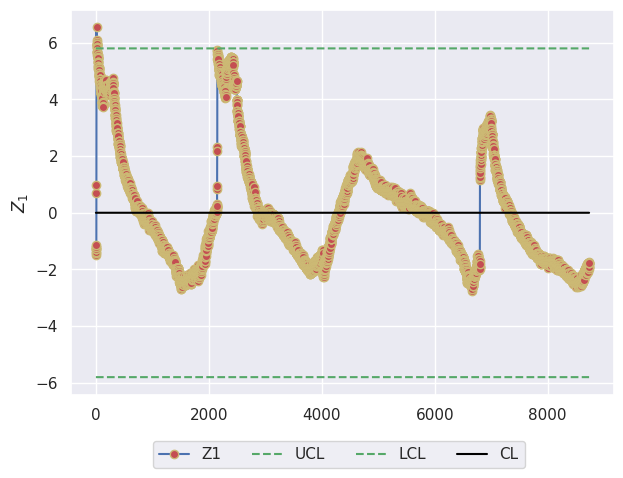

In [85]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

In [86]:
#Accuracy of the dataset with two classification algorithms

KNN_model = KNeighborsClassifier(n_neighbors=5)
scoring=['accuracy']
scores_knn_full_data =cross_validate(KNN_model, df,Y,cv=5, scoring=scoring)
scores_knn_Z = cross_validate(KNN_model,Z, Y,cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(KNN_model, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]
  scores_dict["knn_full_data " + i ]=scores_knn_full_data[i]
  scores_dict["knn_Z " + i ]=scores_knn_Z[i]
  scores_dict["knn_Z12 " + i ]=scores_knn_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)

   gnb_full_data fit_time  gnb_Z fit_time  gnb_Z12 fit_time  \
0                0.005887        0.003277          0.002889   
1                0.004214        0.004099          0.002840   
2                0.005495        0.003229          0.002892   
3                0.004381        0.003201          0.003366   
4                0.004717        0.003285          0.003091   

   knn_full_data fit_time  knn_Z fit_time  knn_Z12 fit_time  \
0                0.012907        0.009109          0.005782   
1                0.012343        0.012956          0.006719   
2                0.011305        0.009492          0.005610   
3                0.012017        0.009770          0.005848   
4                0.011188        0.009307          0.003687   

   gnb_full_data test_accuracy  gnb_Z test_accuracy  gnb_Z12 test_accuracy  \
0                     0.902118             0.945049               0.886090   
1                     0.882084             0.886090               0.911276   
2       

**Confusion Matrix**

In [87]:
#Confusion matrix for Naive Bayes classification algorithm
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction=gnb.predict(X_test)
cm=confusion_matrix(gnb_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['0','1','2','3'],
                  columns=['0','1','2','3'])

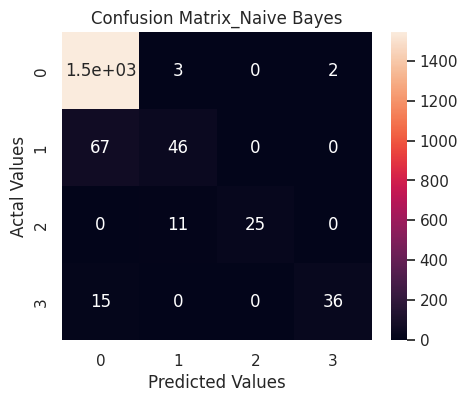

In [88]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_Naive Bayes')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [89]:
#Confusion matrix for k-NN classification algorithm
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
cm=confusion_matrix(KNN_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['0','1','2','3'],
                  columns=['0','1','2','3'])

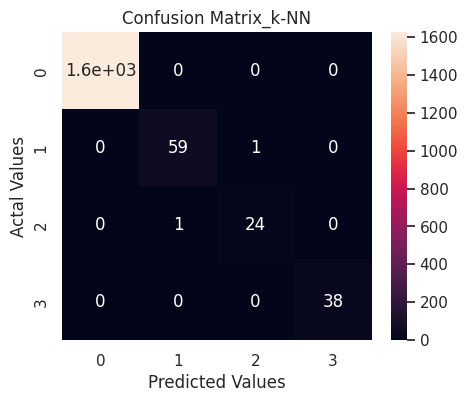

In [90]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_k-NN')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Bar Chart**

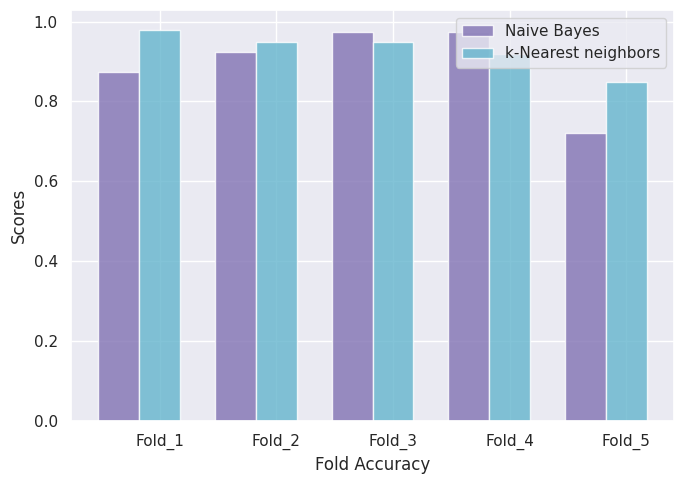

In [91]:
n_groups =5
KNN = (0.98, 0.95, 0.95, 0.92,0.85)
NB = (0.875, 0.925, 0.975, 0.975,0.72)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width,
alpha=opacity,
color='m',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width,KNN, bar_width,
alpha=opacity,
color='c',
label='k-Nearest neighbors')

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()